In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
from pprint import pprint
import lmdb
import caffe
import caffe.proto.caffe_pb2
from caffe.io import datum_to_array

In [27]:
# (1) Load data
datum = caffe.proto.caffe_pb2.Datum()
data=lmdb.open('./mnist_test_lmdb')
pprint(data.info())
pprint(data.stat())
data_txn=data.begin()
data_cursor=data_txn.cursor()
# (2) Load inference-Net
fnModelNetDef='./mnist_logreg_inference.prototxt'
fnModel='./mnist_logreg_iter_100000.caffemodel'
# caffe.set_mode_cpu()
net=caffe.Net(fnModelNetDef,
              fnModel,
              caffe.TEST)
net.blobs['data'].reshape(1,1,28,28)

{'last_pgno': 2523L,
 'last_txnid': 10L,
 'map_addr': 0L,
 'map_size': 10485760L,
 'max_readers': 126L,
 'num_readers': 1L}
{'branch_pages': 13L,
 'depth': 3L,
 'entries': 10000L,
 'leaf_pages': 2500L,
 'overflow_pages': 0L,
 'psize': 4096L}


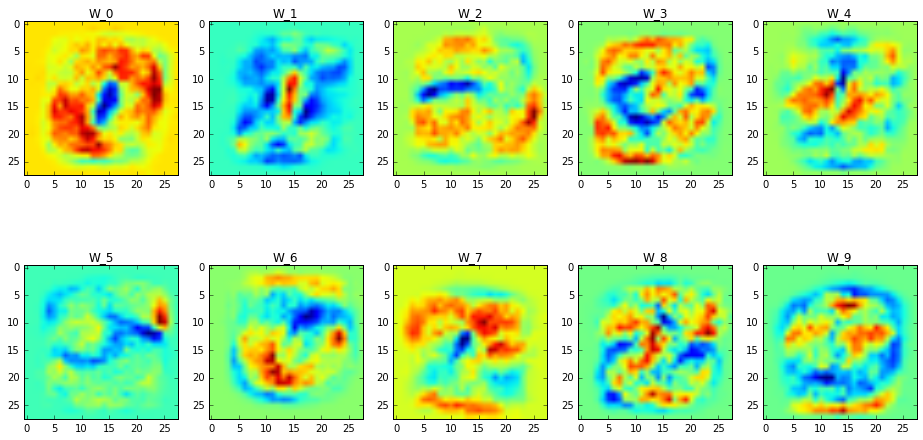

In [42]:
# (3) Visualize weights
dataWeights=net.params['ip'][0].data
numx=5
numy=2
cnt=0
plt.figure(figsize=(16,8))
for xx in xrange(numx):
    for yy in xrange(numy):
        plt.subplot(numy, numx, cnt+1)
        plt.imshow(dataWeights[cnt].reshape((28,28)))
        plt.title('W_%d' % cnt)
        cnt+=1

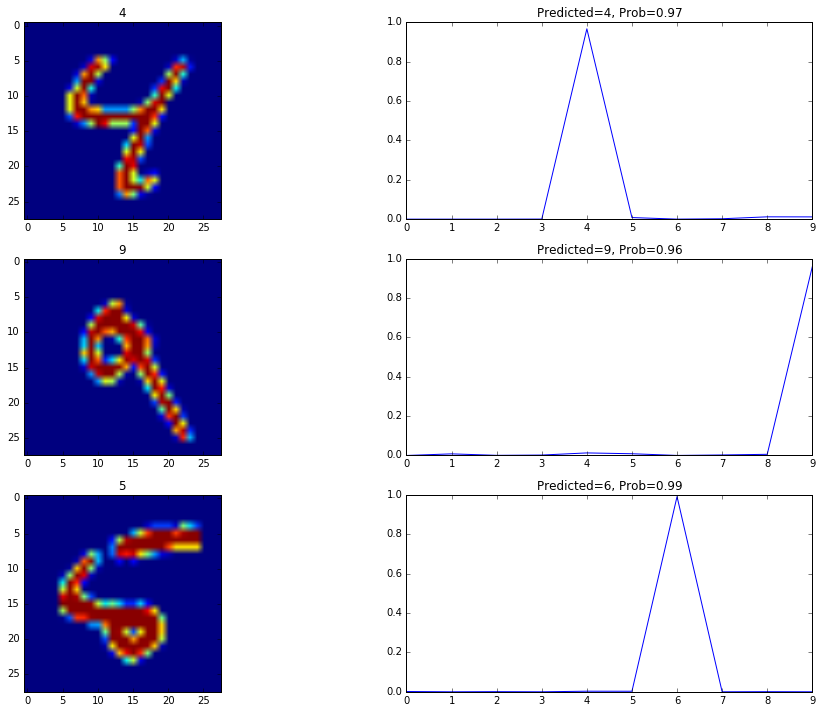

In [44]:
# (4) Try to inference:
datum = caffe.proto.caffe_pb2.Datum()
num=3
plt.figure(figsize=(16,12))

cnt=0
for cnt in xrange(num):
    data_cursor.next()
    key,dataStr=data_cursor.iternext().next()
    datum.ParseFromString(dataStr)
    tdata = caffe.io.datum_to_array(datum).astype(np.float)/255.
    plt.subplot(num,2,2*cnt+1)
    plt.imshow(tdata.reshape(tdata.shape[1:]))
    plt.title('%s' % datum.label)
    #
    net.blobs['data'].data[...] = tdata
    output = net.forward()
    tret=output['prob'][0]
    #
    plt.subplot(num,2,2*cnt+2)
    plt.plot(tret)
    plt.title('Predicted=%s, Prob=%0.2f' % (tret.argmax(), tret.max()))